<a href="https://colab.research.google.com/github/vidhi-sys/PyTorch_DeepLearning_TensorFlow/blob/main/perceptron_trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [30]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,random_state=41,n_classes=2,n_clusters_per_class=1,hypercube=False,class_sep=10)

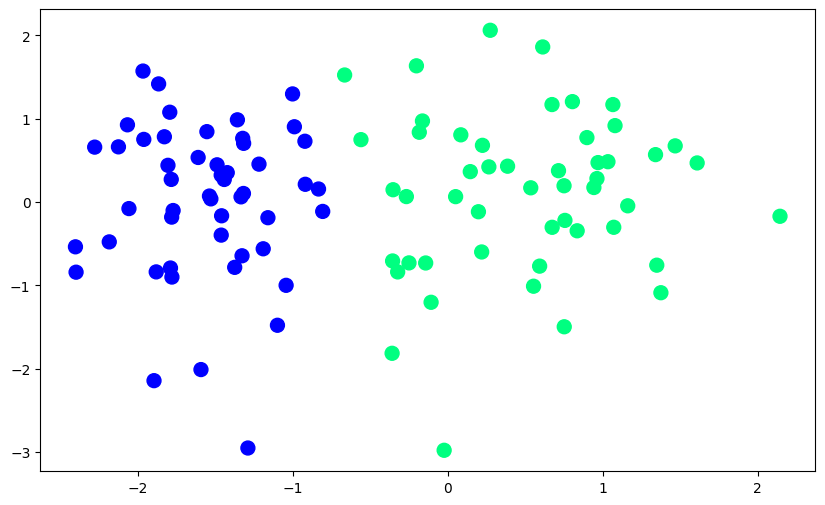

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(x[:, 0], x[:,1], c=y, cmap='winter', s=100)

In [38]:
def step(z):
  return 1 if z>0 else 0

def perceptron_trick(x,y):
  x = np.insert(x, 0, 1, axis=1) #insert 1 in end of the miscalssified point
  weight=np.ones(x.shape[1])# initialise weights as one
  learning_rate=0.1#eta =0.1
  for i in range(1000):##100 epochs
    j=np.random.randint(0,100)
    y_hat=step(np.dot(x[j],weight))
    weight = weight + learning_rate * (x[j]*y[j]-y_hat)
  return weight[0] ,weight[1:]

In [39]:
intercept,coef=perceptron_trick(x,y)

In [40]:
slope=-coef[0]/coef[1]
b=intercept/coef[1]

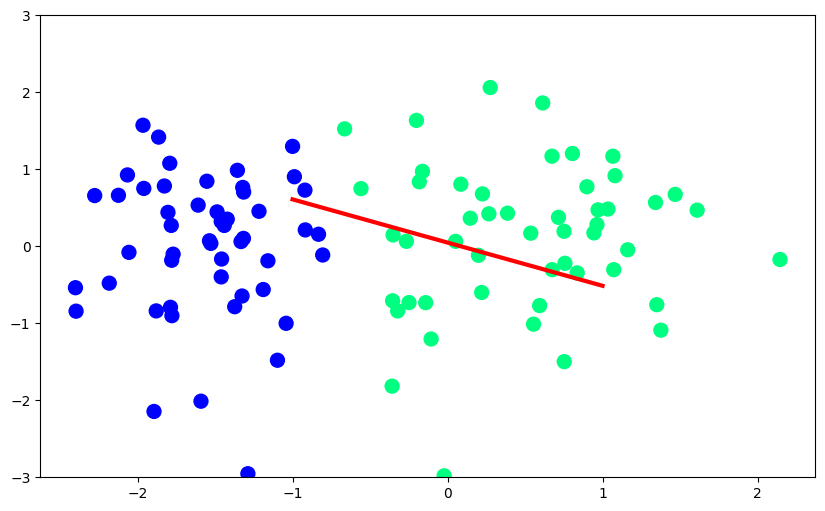

In [41]:
x_input = np.linspace(-1, 1, 100)
y_input = slope * x_input + b

plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='winter', s=100)
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.ylim(-3, 3)
plt.show()